In [168]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

import seaborn as sns

### Problem Statement

In [ ]:
About this file
This dataset provides key features for predicting house prices, including area, bedrooms, bathrooms, stories, 
amenities like air conditioning and parking, and information on furnishing status. It enables analysis and modelling 
to understand the factors impacting house prices and develop accurate predictions in real estate markets.

### Data Gathering

In [129]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### EDA

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [131]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Feature Engineering

In [132]:
df['mainroad'].value_counts().to_dict()

{'yes': 468, 'no': 77}

In [133]:
df['mainroad'].replace({'yes': 1, 'no': 0} , inplace = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(7), object(6)
memory usage: 55.5+ KB


In [135]:
df['guestroom'].value_counts().to_dict()

{'no': 448, 'yes': 97}

In [136]:
df['guestroom'].replace({'yes': 1, 'no': 0} , inplace = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,no,no,no,0,no,furnished


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(8), object(5)
memory usage: 55.5+ KB


In [138]:
df['basement'].value_counts().to_dict()

{'no': 354, 'yes': 191}

In [139]:
df['basement'].replace({'yes': 1, 'no': 0} , inplace = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,no,0,no,furnished


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(9), object(4)
memory usage: 55.5+ KB


In [141]:
df['hotwaterheating'].value_counts().to_dict()

{'no': 520, 'yes': 25}

In [142]:
df['hotwaterheating'].replace({'yes': 1, 'no': 0} , inplace = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,no,0,no,furnished


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(10), object(3)
memory usage: 55.5+ KB


In [144]:
df['airconditioning'].value_counts().to_dict()

{'no': 373, 'yes': 172}

In [145]:
df['airconditioning'].replace({'yes': 1, 'no': 0} , inplace = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,no,furnished


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(11), object(2)
memory usage: 55.5+ KB


In [147]:
df['prefarea'].value_counts().to_dict()

{'no': 417, 'yes': 128}

In [148]:
df['prefarea'].replace({'yes': 1, 'no': 0} , inplace = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [150]:
df['furnishingstatus'].value_counts().to_dict()


{'semi-furnished': 227, 'unfurnished': 178, 'furnished': 140}

In [151]:
df['furnishingstatus'].replace({'semi-furnished': 1, 'unfurnished': 0, 'furnished': 2} , inplace = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [153]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [154]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: >

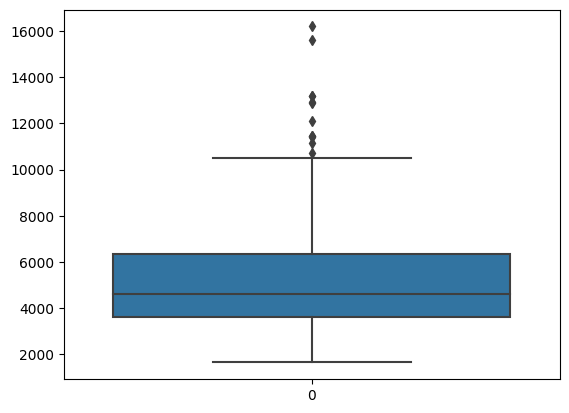

In [155]:
sns.boxplot(df['area'])

In [156]:
q3 = df['area'].quantile(0.75)
q1 = df['area'].quantile(0.25)
print("Q3 : ",q3)
print("Q1 : ",q1)

iqr = q3 - q1
print("IQR : ",iqr)

upper_tail = q3 + 1.5*iqr
print("Upper Tail : ",upper_tail)
lower_tail = q1 - 1.5*iqr
print("Lower Tail : ",lower_tail)


Q3 :  6360.0
Q1 :  3600.0
IQR :  2760.0
Upper Tail :  10500.0
Lower Tail :  -540.0


In [157]:
df[df['area'] > upper_tail]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,2
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,0,1,1,1,2
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,2
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,2
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,1
186,5110000,11410,2,1,2,1,0,0,0,0,0,1,2
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1


In [158]:
np.where(df['area'] > upper_tail)

(array([  7,  10,  56,  64,  66,  69, 125, 129, 186, 191, 211, 403],
       dtype=int64),)

In [159]:
df['area'] = np.where(df['area'] > upper_tail , upper_tail , df['area'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400.0,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620.0,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910.0,3,1,1,0,0,0,0,0,0,0,2


In [160]:
np.where(df['area'] > upper_tail)

(array([], dtype=int64),)

<Axes: >

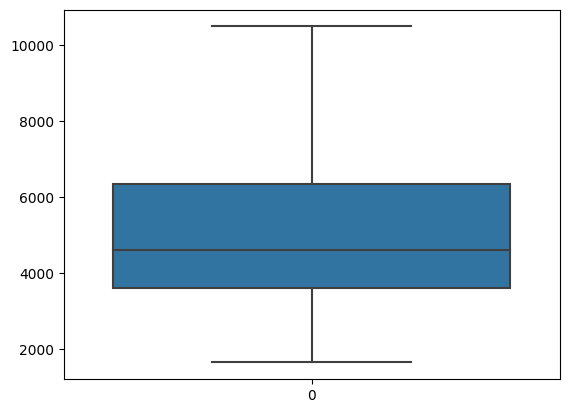

In [161]:
sns.boxplot(df['area'])

### Model Training

In [162]:
x = df.drop('price' , axis = 1)
y = df['price']

In [163]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 32)

In [164]:
linear_reg = LinearRegression()

In [165]:
linear_reg.fit(x_train , y_train)

LinearRegression()

### Model Evaluation

##### LinearRegression

In [166]:
#Training data evaluation

y_train_pred = linear_reg.predict(x_train)

mae = mean_absolute_error(y_train , y_train_pred)
print("Mean absolute error : ",mae)

mse = mean_squared_error(y_train , y_train_pred)
print("Mean squared error : ",mse)

r2 = r2_score(y_train , y_train_pred)
print("R2 Score : ",r2)

Mean absolute error :  783297.3328358085
Mean squared error :  1157958244854.316
R2 Score :  0.6705706910220637


In [167]:
#testing data evaluation

y_test_pred = linear_reg.predict(x_test)

mae = mean_absolute_error(y_test , y_test_pred)
print("Mean absolute error : ",mae)

mse = mean_squared_error(y_test , y_test_pred)
print("Mean squared error : ",mse)

r2 = r2_score(y_test , y_test_pred)
print("R2 Score : ",r2)

Mean absolute error :  756923.1618283334
Mean squared error :  1013305676281.8634
R2 Score :  0.7018885930244414


In [171]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5102.249541,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2005.804353,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,10500.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [173]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400.0,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620.0,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910.0,3,1,1,0,0,0,0,0,0,0,2


In [175]:
df.to_csv('Housing_V1.csv' , index = False)